# Deep Finance Researcher with TODO Planner

Build an intelligent agent with task planning capabilities that can search financial documents (RAG) and live market data.

![image.png](attachment:image.png)

## Setup

In [ ]:
!pip install -U langchain langchain-community sentence-transformers qdrant-client langchain-qdrant fastembed fastembed-gpu langgraph-checkpoint-sqlite langchain-openai langchain-mcp-adapters

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# from dotenv import load_dotenv
# load_dotenv()

In [5]:
from langchain_openai import ChatOpenAI
from langchain.agents import create_agent

from langgraph.checkpoint.sqlite import SqliteSaver
import sqlite3

# Langchain built-in middlewares
from langchain.agents.middleware import TodoListMiddleware, SummarizationMiddleware

# centralized rag tools
from scripts.rag_tools import hybrid_search, live_finance_researcher

# centralized prompts and agents utilities
from scripts.prompts import MULTIMODEL_AGENT_PROMPT
from scripts.agent_utils import stream_agent_response

# you can choose model as per your choice
model = ChatOpenAI(model="gpt-4o-mini")

/content/scripts/rag_tools.py:63: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the `langchain-huggingface package and should be used instead. To use it run `pip install -U `langchain-huggingface` and import as `from `langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(


modules.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/201 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

finnish.txt: 0.00B [00:00, ?B/s]

arabic.txt: 0.00B [00:00, ?B/s]

dutch.txt:   0%|          | 0.00/453 [00:00<?, ?B/s]

english.txt:   0%|          | 0.00/936 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

danish.txt:   0%|          | 0.00/424 [00:00<?, ?B/s]

german.txt: 0.00B [00:00, ?B/s]

french.txt:   0%|          | 0.00/813 [00:00<?, ?B/s]

greek.txt: 0.00B [00:00, ?B/s]

hungarian.txt: 0.00B [00:00, ?B/s]

norwegian.txt:   0%|          | 0.00/851 [00:00<?, ?B/s]

italian.txt: 0.00B [00:00, ?B/s]

spanish.txt: 0.00B [00:00, ?B/s]

portuguese.txt: 0.00B [00:00, ?B/s]

romanian.txt: 0.00B [00:00, ?B/s]

russian.txt: 0.00B [00:00, ?B/s]

swedish.txt:   0%|          | 0.00/559 [00:00<?, ?B/s]

turkish.txt:   0%|          | 0.00/260 [00:00<?, ?B/s]

## Create Agent with TODO Planner and Summarization

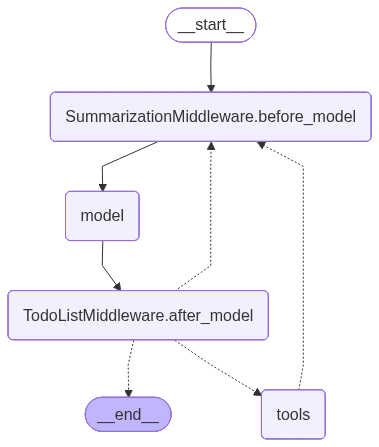

In [6]:
from langgraph.checkpoint.sqlite import SqliteSaver
import sqlite3
from langchain.agents import create_agent

def get_agent():
    conn = sqlite3.connect('data/todo_financial_research_agent.db', check_same_thread=False)
    checkpointer = SqliteSaver(conn=conn)

    agent = create_agent(
        model=model,
        tools=[hybrid_search, live_finance_researcher],
        system_prompt=MULTIMODEL_AGENT_PROMPT,
        checkpointer=checkpointer,
        middleware=[
            SummarizationMiddleware(
                model=model,
                trigger=[('messages', 25)],
                keep=('messages', 10)
            ),
            TodoListMiddleware()
        ]
    )

    return agent

agent = get_agent()

agent

## Examples

In [7]:
# Historical data query
stream_agent_response(agent, "What was Amazon's revenue in Q1 2024?", thread_id="session_1")


  Tool Called: hybrid_search
   Args: {}


  Tool Called: 
   Args: {}

{"company_name":"amazon","doc_type":"10-q","fiscal_year":"2024","fiscal_quarter":"q1"}
  Tool Result (length: 25545 chars)

In Q1 2024, Amazon's consolidated net sales amounted to **$143.313 billion**, which reflects a year-over-year increase of 13% compared to Q1 2023. The breakdown of the net sales is as follows:

| Segment            | Q1 2023 Revenue (in millions) | Q1 2024 Revenue (in millions) |
|--------------------|-------------------------------|-------------------------------|
| North America      | $76,881                       | $86,341                       |
| International      | $29,123                       | $31,935                       |
| AWS                | $21,354                       | $25,037                       |
| **Total**          | **$127,358**                  | **$143,313**                  |

The increase in North America revenue was driven by higher unit sales and increased ad

In [9]:
# Live market data
stream_agent_response(agent, "What is the current stock price of Tesla and latest news?", thread_id="session_2")


  Tool Called: live_finance_researcher
   Args: {}


  Tool Called: 
   Args: {}


  Tool Result (length: 699 chars)


  Tool Called: live_finance_researcher
   Args: {}


  Tool Called: 
   Args: {}


  Tool Result (length: 3463 chars)

The current stock price of Tesla, Inc. (TSLA) is **$437.52**. Here are some key performance metrics:

### Key Stock Information:
- **Previous Close:** $438.55
- **Open:** $439.52
- **Day Low:** $435.26
- **Day High:** $447.25
- **Volume:** 60,220,551 shares
- **Market Capitalization:** $1.46 trillion
- **52 Week Range:** $214.25 - $498.83
- **Trailing P/E Ratio:** 303.83
- **Forward P/E Ratio:** 201.29
- **Profit Margin:** 5.31%
- **Return on Equity (ROE):** 6.79%
- **Debt to Equity Ratio:** 17.08

For more details on Tesla, visit their [official website](https://www.tesla.com).

### Latest News on Tesla:
1. **[A broadening playbook: Wall Street sees stock market gains beyond tech](https://finance.yahoo.com/news/a-broadening-playbook-wall-street-sees-

In [10]:
# Complex query with TODO planning
stream_agent_response(
    agent,
    "Compare Microsoft's Q2 2024 revenue from SEC filings with its current stock performance",
    thread_id="session_3"
)


  Tool Called: hybrid_search
   Args: {}


  Tool Called: 
   Args: {}


  Tool Called: live_finance_researcher
   Args: {}


  Tool Called: 
   Args: {}

{"company_name":"microsoft","doc_type":"10-q","fiscal_year":"2024","fiscal_quarter":"q2"}
  Tool Result (length: 0 chars)


  Tool Result (length: 1384 chars)


  Tool Called: hybrid_search
   Args: {}


  Tool Called: 
   Args: {}

{"company_name":"microsoft","doc_type":"10-q","fiscal_year":"2024","fiscal_quarter":"q2"}
  Tool Result (length: 0 chars)

It seems that I was unable to find Microsoft's Q2 2024 revenue data from SEC filings. However, I do have current stock performance information. Here's a summary of the findings:

### Microsoft Corporation (MSFT) Current Stock Performance
- **Current Price**: $459.86
- **Previous Close**: $456.66
- **Day’s Range**: $456.48 - $463.19
- **Market Cap**: $3.42 trillion
- **Volume**: 34,246,650 shares

#### Key Financial Metrics:
- **52 Week Range**: $344.79 - $555.45
- **P/E Ratio (Traili